In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import glob
import re
from scipy.optimize import curve_fit
#df = pd.read_csv('SimplestClean15sigma/131125_darkrate_1750_10000_1_off_clean.csv')

In [2]:
"""
Cleaned CSV has columns:

            'baseline': mean_b_array,
            'sd_baseline': sigma_b_array,
            'amplitude': all_amplitudes,
            'peak_time': all_peak_times,
            'FWHM': all_FWHM,
            't1_of_FWHM': all_t1,
            't2_of_FWHM': all_t2,
            'time_above_15sigma': all_time_above_15thresh,
            'first_15sigma_crossing': all_first_15crossing,
            'second_15sigma_crossing': all_second_15crossing,
            'time_above_10sigma': all_time_above_10thresh,
            'first_10sigma_crossing': all_first_10crossing,
            'second_10sigma_crossing': all_second_10crossing,
            'time_above_5sigma': all_time_above_5thresh,
            'first_5sigma_crossing': all_first_5crossing,
            'second_5sigma_crossing': all_second_5crossing,
            'integral_pC': all_integrals_picocharge,
            'peaks_over_15sigma_threshold': number_of_maxima_all,
            'event_timestamps' : event_timestamps[:-1]
"""

"\nCleaned CSV has columns:\n\n            'baseline': mean_b_array,\n            'sd_baseline': sigma_b_array,\n            'amplitude': all_amplitudes,\n            'peak_time': all_peak_times,\n            'FWHM': all_FWHM,\n            't1_of_FWHM': all_t1,\n            't2_of_FWHM': all_t2,\n            'time_above_15sigma': all_time_above_15thresh,\n            'first_15sigma_crossing': all_first_15crossing,\n            'second_15sigma_crossing': all_second_15crossing,\n            'time_above_10sigma': all_time_above_10thresh,\n            'first_10sigma_crossing': all_first_10crossing,\n            'second_10sigma_crossing': all_second_10crossing,\n            'time_above_5sigma': all_time_above_5thresh,\n            'first_5sigma_crossing': all_first_5crossing,\n            'second_5sigma_crossing': all_second_5crossing,\n            'integral_pC': all_integrals_picocharge,\n            'peaks_over_15sigma_threshold': number_of_maxima_all,\n            'event_timestamps' : ev

In [3]:
#find the difference between the first timestamp and final timestamp
#timestamp_column = df['event_timestamps']
#timetaken = timestamp_column.iloc[-1] - timestamp_column.iloc[0]

#amplitude_column = df['amplitude'] # using amplitude arbitrarily as data set includes all valuable data and each column in same length

#dark_rate = len(amplitude_column) / timetaken
#print(dark_rate)

In [4]:
"""
Need to find an average over three trials.
Some trials end up having very low numbers of events (super noisy data collection), these shouldn't be considered.
Need to plot dark rate against voltage. 
Try using the naming convention to loop over events and plot them? 

Name: date+note+voltage+10000+trialnumber+lights+clean.csv

"""

"\nNeed to find an average over three trials.\nSome trials end up having very low numbers of events (super noisy data collection), these shouldn't be considered.\nNeed to plot dark rate against voltage. \nTry using the naming convention to loop over events and plot them? \n\nName: date+note+voltage+10000+trialnumber+lights+clean.csv\n\n"

In [5]:
#15sigma threshold

#eliminate files with less than 1000 events in after cleaning.

#allfiles = glob.glob('PMT2_cleaned/*cleaned.csv')
#allfiles = glob.glob('ProcessedPMT2/*3.csv')
allfiles = glob.glob('PMT4_AllAnalysis/PMT4Cleaned/*cleaned.csv')
enough_events = []

for f in allfiles:
    df = pd.read_csv(f)
    if len(df)<1000:
        print(f"Discarding {f}, only {len(df)} events after cleaning")
        continue
    enough_events.append(f)



In [6]:
#15sigma threshold

# first find the place value of the smallest digit in the timesteps:
def last_digit_place_value(x):
    """
    Returns the place value of the last digit in x.
    Example: 0.1234 -> 0.0001, 15.20 -> 0.01, 5000 -> 1000
    """
    s = str(x)

    # Handle scientific notation
    if 'e' in s.lower():
        s = format(float(x), '.15f').rstrip('0').rstrip('.')

    if '.' in s:
        frac_part = s.split('.')[1]
        return 10 ** (-len(frac_part))
    else:
        trailing_zeros = len(s) - len(s.rstrip('0'))
        return 10 ** trailing_zeros
    
#calculate dark rate for each csv in enough_events and their errors
dark_rates = {}
for file in enough_events:
    df = pd.read_csv(file)
    timestamp_column = df['event_timestamps']
    timetaken = timestamp_column.iloc[-1] - timestamp_column.iloc[0]

    amplitude_column = df['amplitude']

    dark_rate = len(amplitude_column) / timetaken

# calculate errors
    N = len(amplitude_column)
    t_last_err = 0.5 * last_digit_place_value(timestamp_column.iloc[-1])
    t_first_err = 0.5 * last_digit_place_value(timestamp_column.iloc[0])
    t_err = np.sqrt(t_last_err**2 + t_first_err**2)

    #DR_err = np.sqrt(N)
    DR_err = np.sqrt((np.sqrt(N)/timetaken)**2 + ((N*t_err)/timetaken**2)**2)
    #DR_err = np.sqrt((np.sqrt(N)/timetaken)**2 + ((N*t_err)/timetaken**2)**2 +(0.05*dark_rate)**2)
    print(DR_err)

# disregard dark rate value out of average if an anomaly
    if dark_rate > 40000: 
        print(f"Discarding {file} due to unusual dark rate = {dark_rate:.3f}Hz")
        continue



    dark_rates[file] = (dark_rate, DR_err)
    print(f"{file} has dark rate = {dark_rate:.3f} Hz")
    print(f"{file} ",'amount of events in clean files', len(amplitude_column))

#PUT ERROR PROPAGATION HERE FOR EACH RATE

0.29613384934924647
PMT4_AllAnalysis/PMT4Cleaned\220126_darkrate_1750_10000_1_on_processed_threshold11_cleaned.csv has dark rate = 22.818 Hz
PMT4_AllAnalysis/PMT4Cleaned\220126_darkrate_1750_10000_1_on_processed_threshold11_cleaned.csv  amount of events in clean files 5937
0.15849436506266917
PMT4_AllAnalysis/PMT4Cleaned\220126_darkrate_1750_10000_2_off_processed_threshold11_cleaned.csv has dark rate = 11.079 Hz
PMT4_AllAnalysis/PMT4Cleaned\220126_darkrate_1750_10000_2_off_processed_threshold11_cleaned.csv  amount of events in clean files 4886
0.483762154518777
PMT4_AllAnalysis/PMT4Cleaned\220126_darkrate_1750_10000_3_on_processed_threshold11_cleaned.csv has dark rate = 19.543 Hz
PMT4_AllAnalysis/PMT4Cleaned\220126_darkrate_1750_10000_3_on_processed_threshold11_cleaned.csv  amount of events in clean files 1632
0.7132679807910887
PMT4_AllAnalysis/PMT4Cleaned\220126_darkrate_1800_10000_1_off_processed_threshold11_cleaned.csv has dark rate = 60.392 Hz
PMT4_AllAnalysis/PMT4Cleaned\220126_d

21.180358932467314
0.28360230908573864
41.408646501039065
0.27876312577038
649.1048124600301
9.17217877636186
465.18720059104743
3.398623038052836
4597.35007558942
30.30457328343589
11.078744780652666
99.99993281572677
205.16835031948403
896.2957266768193
3218.0953398173556
1750 V : combined dark rate = 1.613e+01 ± 1.624e-01 Hz
1800 V : combined dark rate = 7.070e+01 ± 3.797e-01 Hz
1850 V : combined dark rate = 4.271e+02 ± 4.871e+00 Hz
1900 V : combined dark rate = 6.807e+02 ± 3.526e+00 Hz
2000 V : combined dark rate = 3.908e+03 ± 1.936e+01 Hz


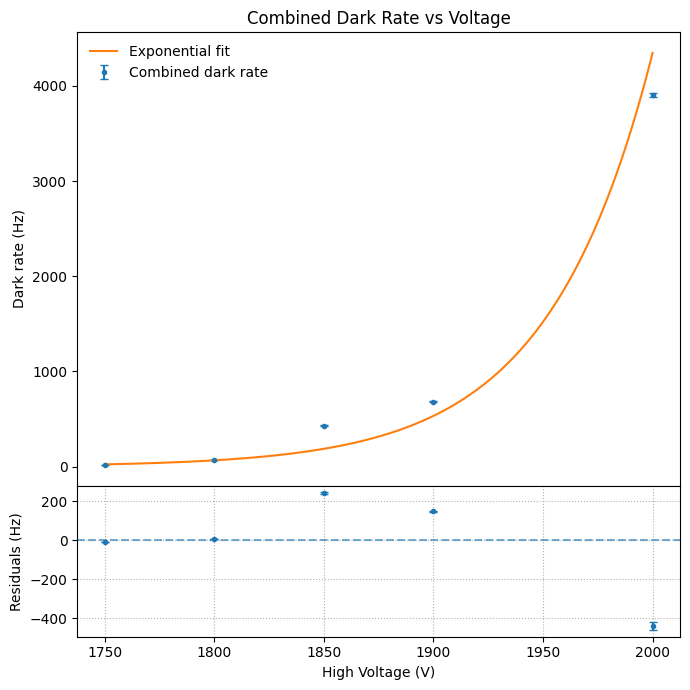


Chi² = 6.635e+03
DoF = 3
Reduced Chi² = 2.212e+03


In [7]:
#15sigma threshold
#plot dark rate against voltage for lights on and lights off on the same plot.

#these will be lists of voltages with their corresponding dark rates. eg. {1750: [213,453,241], 2000: [542,622,315]}
lights_on = {} 
lights_off = {}

for file, (darkrate, DR_err) in dark_rates.items():
    df = pd.read_csv(file)
    #extract voltage, trial number and light on/off from filename
    match = re.search(r"darkrate_(\d+)_10000_(\d+)_(on|off)", file)

    voltage = int(match.group(1))
    trial_number = int(match.group(2))
    light_state = match.group(3)

    #store light state.
    if light_state == 'on':
        lights_on.setdefault(voltage,[]).append((darkrate, DR_err))
    if light_state == 'off':
        lights_off.setdefault(voltage,[]).append((darkrate, DR_err))

#average trials for each voltage
#ADD ERROR ON MEAN AND PUT IN PLOT
for voltage, rate_list in lights_on.items():
    rate, err= zip(*rate_list)
    
    rate = np.array(rate)
    err = np.array(err)

    valid_mask = (err > 0) & np.isfinite(err) & np.isfinite(rate) 
    valid_rate = rate[valid_mask]
    valid_err = err[valid_mask]

    x = len(valid_rate)
    mean_rate = sum(valid_rate)/len(valid_rate)
    mean_err = np.sqrt((1/x)**2 * np.sum((valid_err**2))) # combine in quadrature
    lights_on[voltage] = (mean_rate, mean_err) #replace the list with a single average rate element
    print(mean_rate)
    print(mean_err)

for voltage, rate_list in lights_off.items():
    rate, err= zip(*rate_list)
   
    rate = np.array(rate)
    err = np.array(err)

    valid_mask = (err > 0) & np.isfinite(err) & np.isfinite(rate) 
    valid_rate = rate[valid_mask]
    valid_err = err[valid_mask]

    x = len(valid_rate)
    mean_rate = sum(valid_rate)/len(valid_rate)
    mean_err = np.sqrt((1/x)**2 * np.sum((valid_err**2))) 
    lights_off[voltage] = (mean_rate, mean_err)
    print(mean_rate)

voltages_on = sorted(lights_on.keys())
average_rate_on = [lights_on[v][0] for v in voltages_on]
average_err_on = [lights_on[v][1] for v in voltages_on]
voltages_off = sorted(lights_off.keys())
average_rate_off = [lights_off[v][0] for v in voltages_off]
average_err_off = [lights_off[v][1] for v in voltages_off]

combined_dark = {}

all_voltages = sorted(set(lights_on.keys()) | set(lights_off.keys()))

for V in all_voltages:
    values = []
    errors = []

    if V in lights_on:
        r, e = lights_on[V]
        if np.isfinite(r) and np.isfinite(e) and e > 0:
            values.append(r)
            errors.append(e)

    if V in lights_off:
        r, e = lights_off[V]
        if np.isfinite(r) and np.isfinite(e) and e > 0:
            values.append(r)
            errors.append(e)

    values = np.array(values)
    errors = np.array(errors)

    mean = np.mean(values)
    err = np.sqrt(np.sum(errors**2)) / len(values)

    combined_dark[V] = (mean, err)

    print(f"{V} V : combined dark rate = {mean:.3e} ± {err:.3e} Hz")

voltages = np.array(sorted(combined_dark.keys()))
rates = np.array([combined_dark[V][0] for V in voltages])
errors = np.array([combined_dark[V][1] for V in voltages])


def exponential_C(V, A, B, C):
    return A * np.exp(B * V) + C

def exponential(V, A, B):
    return A * np.exp(B * V)

def linear(V, m, c):
    return m*V + c

mask = np.isfinite(rates) & np.isfinite(errors) & (errors > 0)
V_fit = voltages[mask]
R_fit = rates[mask]
E_fit = errors[mask]

popt, pcov = curve_fit(
    exponential,
    V_fit,
    R_fit,
    sigma=E_fit,
    absolute_sigma=True,
    p0=[1, 0.01]
)

perr = np.sqrt(np.diag(pcov))

V_dense = np.linspace(np.min(V_fit), np.max(V_fit), 1000)
R_dense = exponential(V_dense, *popt)

fig, (ax_main, ax_res) = plt.subplots(2, 1, sharex=True, figsize=(7,7),
                                     gridspec_kw={'height_ratios':[3,1],'hspace':0})

ax_main.errorbar(V_fit, R_fit, yerr=E_fit, fmt='o', ms=3, capsize=3, label="Combined dark rate")
ax_main.plot(V_dense, R_dense, '-', label="Exponential fit")

ax_main.set_ylabel("Dark rate (Hz)")
ax_main.set_title("Combined Dark Rate vs Voltage")
ax_main.legend(frameon=False)
ax_main.tick_params(axis='x', labelbottom=False)

residuals = R_fit - exponential(V_fit, *popt)

ax_res.axhline(0, ls="--", alpha=0.6)
ax_res.errorbar(V_fit, residuals, yerr=E_fit, fmt='o', ms=3, capsize=3)
ax_res.set_xlabel("High Voltage (V)")
ax_res.set_ylabel("Residuals (Hz)")
ax_res.grid(True, linestyle=":")

plt.tight_layout()
plt.show()

chi2 = np.sum((residuals / E_fit)**2)
nu = len(V_fit) - len(popt)

print(f"\nChi² = {chi2:.3e}")
print(f"DoF = {nu}")
print(f"Reduced Chi² = {chi2/nu:.3e}")